

##  Analyzing Relationships in Coffee Drying Data

This code is designed to analyze and visualize the data from a raw Excel file for data collected in Genova, Quindio, Colombia, to build the relationships between key parameters involved in the coffee drying process, specifically focusing on bean moisture, relative humidity, grain temperature, and overall temperature. By loading data from an Excel file, the code calculates Pearson and Spearman correlation matrices to quantify linear and non-linear relationships. These correlations provide insights into how changes in environmental conditions (e.g., humidity and temperature) influence the moisture content of coffee beans, which is critical for optimizing the drying process. Additionally, the code generates a heatmap to visually represent the strength and direction of these relationships, as well as scatter plots with regression lines to illustrate trends between bean moisture and each environmental parameter. This analysis is particularly useful for coffee farmers and researchers, as it helps identify key factors affecting drying efficiency and bean quality, enabling data-driven decisions to improve post-harvest processing.


             Unnamed: 0  Bean Moisture  Relative Humidity  Grain Temperature  \
0  26/10/2023, 13:56:05           32.1                 78               25.0   
1  27/10/2023, 08:20:28           66.8                 82               18.9   
2  27/10/2023, 10:58:55           27.1                 73               24.9   
3  27/10/2023, 13:56:10           29.5                 84               21.7   
4  27/10/2023, 16:24:17           32.5                 85               23.0   

   Overall Temperature  tiempo_Horas  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0                 26.0      0.000000         NaN         NaN         NaN   
1                 20.3     18.406271         NaN         NaN         NaN   
2                 24.2     21.047188         NaN         NaN         NaN   
3                 20.8     24.001397         NaN         NaN         NaN   
4                 20.1     26.470098         NaN         NaN         NaN   

  Unnamed: 9  
0        NaN  
1        NaN  
2        NaN  
3 

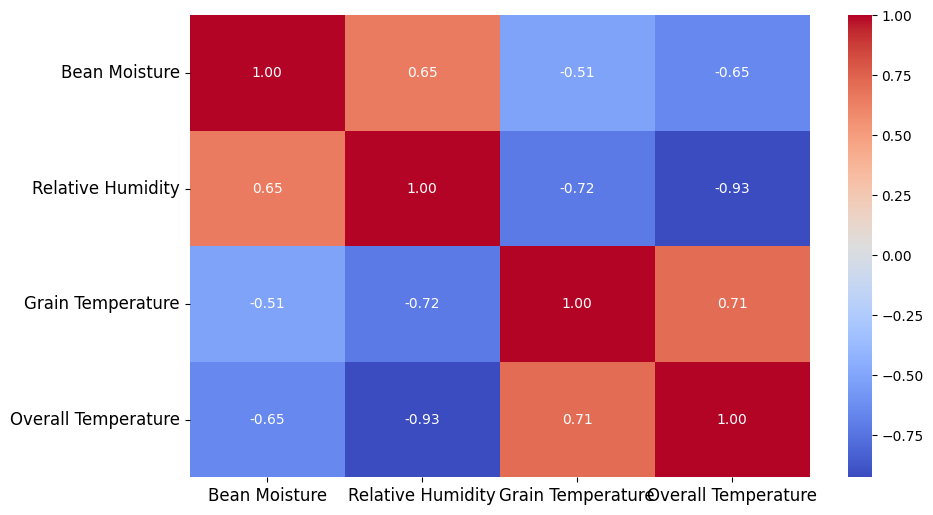

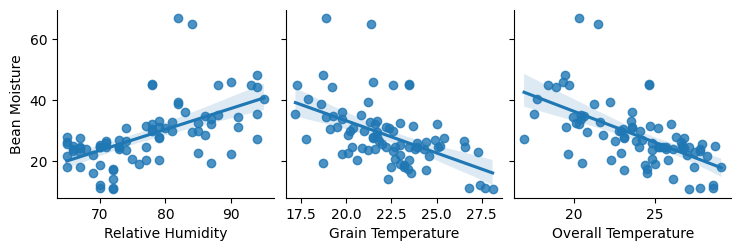

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'RawDataQuantik.xlsx'
sheet_name = 'DatosCrudos'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rename columns for better readability in plots
df.rename(columns={
    'MdataBaseHumeda': 'Bean Moisture',
    'HRdata': 'Relative Humidity',
    'TemperatureGrano': 'Grain Temperature',
    'Temperaturedata': 'Overall Temperature'
}, inplace=True)

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

# Calculate Pearson correlation
pearson_corr = df[['Bean Moisture', 'Relative Humidity', 'Grain Temperature', 'Overall Temperature']].corr(method='pearson')

# Calculate Spearman correlation (for non-linear relationships)
spearman_corr = df[['Bean Moisture', 'Relative Humidity', 'Grain Temperature', 'Overall Temperature']].corr(method='spearman')

# Print the correlation matrices
print("Pearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Spearman Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Scatter plots to visualize relationships
sns.pairplot(df, x_vars=['Relative Humidity', 'Grain Temperature', 'Overall Temperature'], y_vars=['Bean Moisture'], kind='reg')
#plt.suptitle('Scatter Plots of Bean Moisture vs. Environmental Parameters', y=1.02, fontsize=16)
plt.show()

### Data Fitting for Coffee Drying Process

This Python script performs data fitting for the coffee drying process by applying various mathematical models to experimental data. The goal is to analyze the relationship between time, moisture content, and temperature during the drying process and identify the best-fitting model to describe the drying kinetics.

#### Key Steps in the Code:
1. **Data Extraction**:
   - The script extracts experimental data for moisture content (`M_t`), time in hours (`time_hours`), and temperature (`temperature_data`).
   - The moisture ratio (`MR_data`) is calculated using the formula:
     \[
     MR = \frac{M_t - M_e}{M_0 - M_e}
     \]
     where \(M_0\) is the initial moisture content and \(M_e\) is the equilibrium moisture content.

2. **Mathematical Models**:
   - The script defines 14 mathematical models commonly used to describe drying kinetics, such as the Lewis model, Page model, Henderson and Pabis model, and others.
   - Each model is provided with initial parameter guesses (`p0`) and bounds to ensure realistic fitting.

3. **Model Fitting**:
   - The `curve_fit` function from `scipy.optimize` is used to fit each model to the experimental data.
   - For the "Successive Residues" model, temperature data is incorporated as an additional parameter.

4. **Evaluation Metrics**:
   - The Mean Squared Error (MSE) and R² score are calculated for each model to evaluate its accuracy in describing the experimental data.
   - The coefficients of each model are printed, along with the initial and final moisture ratios.

5. **Visualization**:
   - The fitted models are plotted against the experimental data for visual comparison.
   - A scatter plot of the observed data is overlaid with the fitted curves to assess the quality of the fit.

6. **Output**:
   - The script saves the plot as a high-resolution PNG file (`model_fitting.png`) and displays it for further analysis.



Lewis Coefficients: [0.00096781]
Lewis MSE: 0.1833
Lewis R²: 0.1481
--------------------------------------------------
Page Coefficients: [2.14212298e-08 2.84116406e+00]
Page MSE: 0.1599
Page R²: 0.2568
--------------------------------------------------
Modified Page Coefficients: [2.22508696e-03 5.86447911e+00]
Modified Page MSE: 0.1532
Modified Page R²: 0.2881
--------------------------------------------------
Henderson and Pabis Coefficients: [1.22943653 0.00164673]
Henderson and Pabis MSE: 0.1728
Henderson and Pabis R²: 0.1967
--------------------------------------------------
Logarithmic Coefficients: [ 8.52428225e+02  1.83037198e-06 -8.51206317e+02]
Logarithmic MSE: 0.1673
Logarithmic R²: 0.2226
--------------------------------------------------
Two-term Coefficients: [0.5066353  0.00165193 0.7250947  0.00165422]
Two-term MSE: 0.1728
Two-term R²: 0.1967
--------------------------------------------------
Modified Henderson and Pabis Coefficients: [0.29094684 0.00164604 0.9362446  

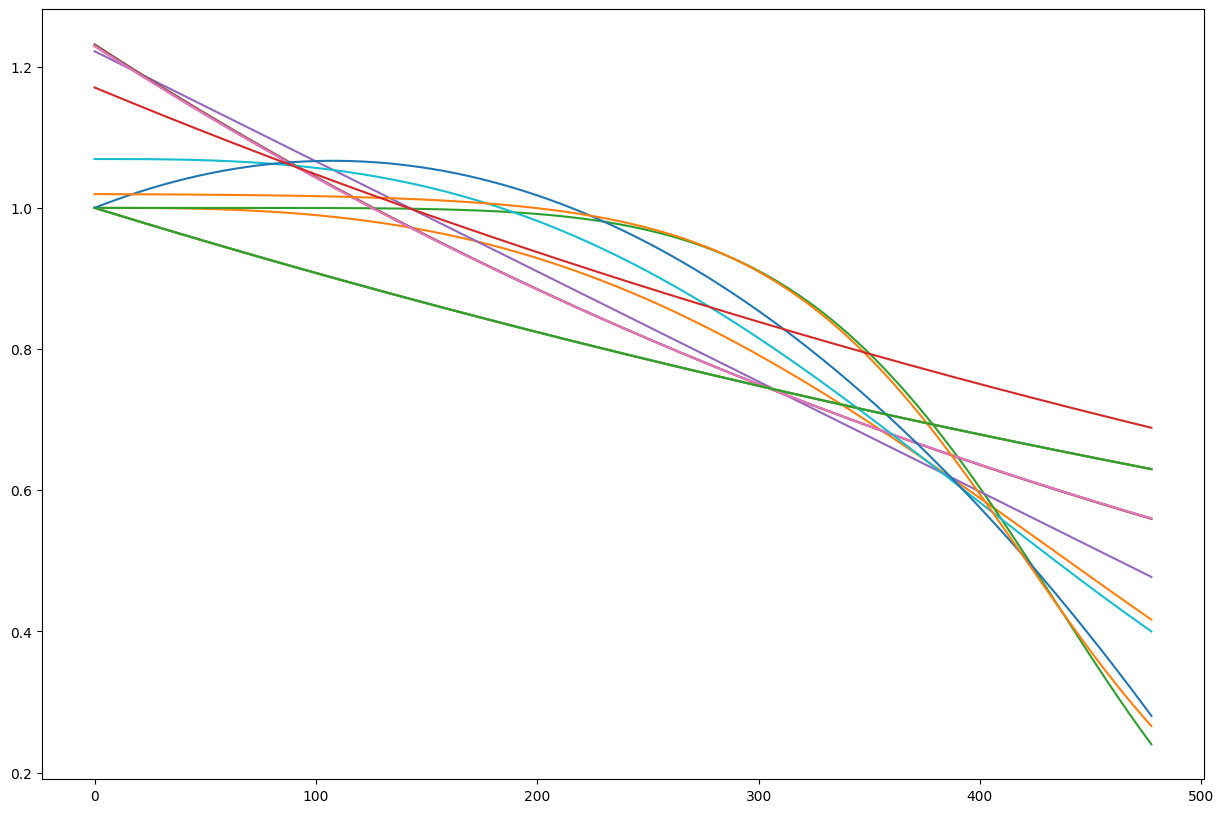

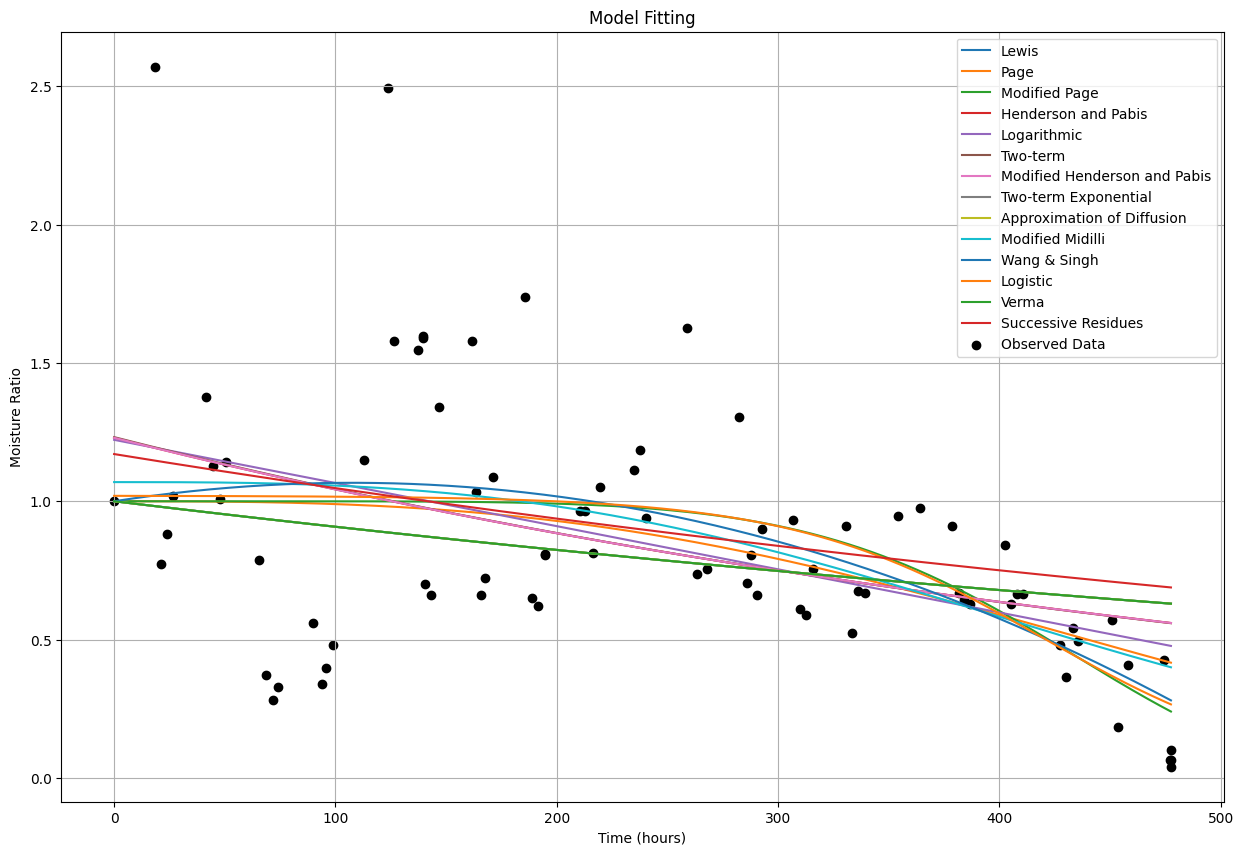

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

# Extract data from the experimental data
# MdataBaseHumeda: Moisture content at time t
M_t = np.array([32.1, 66.8, 27.1, 29.5, 32.5, 40.4, 34.9, 32.3, 35.2, 27.4, 18.2, 16.2, 17.3, 22.4, 17.5, 18.8, 20.6, 35.4, 65.1, 44.9, 44.2, 45.1, 45.3, 25.5, 24.6, 39.6, 44.9, 32.8, 24.6, 26.0, 34.0, 48.4, 24.4, 23.7, 27.8, 27.9, 31.3, 31.3, 28.0, 33.2, 34.6, 36.2, 30.8, 45.9, 26.3, 26.7, 38.8, 25.6, 27.8, 24.6, 29.9, 30.6, 23.5, 23.0, 26.7, 30.1, 21.6, 24.9, 24.8, 30.9, 31.6, 30.1, 24.8, 24.2, 23.9, 28.6, 23.9, 24.7, 24.7, 20.6, 18.1, 22.0, 20.9, 22.6, 14.1, 19.0, 19.4, 11.4, 12.2, 11.4, 10.9])

# tiempo_Horas: Time in hours
time_hours = np.array([0, 18.40627055555555, 21.04718805555556, 24.0013975, 26.47009833333333, 41.69804805555555, 44.8997, 47.89428166666666, 50.76427527777778, 65.60122916666667, 68.79387416666667, 71.68843527777777, 73.99734138888888, 90.02816305555555, 93.74621555555555, 95.59563666666666, 99.0793175, 112.9603227777778, 123.7978422222222, 126.4107747222222, 137.5075997222222, 139.4327088888889, 139.4343519444444, 140.6822163888889, 143.3317894444444, 146.7388263888889, 161.7346647222222, 163.5178486111111, 165.6332152777778, 167.4514308333333, 171.2591241666667, 185.4672577777778, 188.9521388888889, 191.4661752777778, 194.6582525, 194.6718536111111, 210.3986111111111, 212.7734461111111, 216.3134766666667, 219.7050963888889, 234.9116352777778, 237.5193613888889, 240.4011369444444, 258.8672516666667, 263.2419147222222, 267.7719619444445, 282.4684091666667, 285.9918041666667, 287.8421847222222, 290.4400872222222, 292.5462469444444, 306.5215683333333, 309.8411647222222, 312.3889813888889, 315.7849255555556, 330.5003236111111, 333.3196219444445, 335.8960672222222, 339.1053147222222, 354.3572766666667, 364.2427602777778, 378.5657113888889, 381.5895197222222, 384.0207261111111, 386.6301605555556, 402.3497252777778, 405.0657866666667, 408.1366986111111, 410.6104627777778, 427.3293077777778, 430.0131408333334, 433.1927761111111, 435.5384558333333, 450.7424311111111, 453.5253308333333, 457.9244411111111, 474.3589105555556, 477.1367680555555, 477.2846566666666, 477.36063, 477.4769725])

# Temperature data (in Celsius)
temperature_data = np.array([26, 20.3, 24.2, 20.8, 20.1, 17.7, 20.6, 20.3, 20.4, 16.9, 29.1, 24.5, 23.1, 19.6, 24.5, 24.4, 22.3, 17.5, 21.5, 19.7, 18.9, 24.6, 24.6, 26.7, 24, 22.2, 18.4, 21.6, 25.3, 24.8, 20.4, 19.4, 26.8, 24.8, 23.1, 23.1, 19.5, 23.6, 26.3, 23.5, 19.9, 23.6, 25.2, 19.3, 26.6, 22.5, 21.2, 27.9, 26.8, 25.5, 22.8, 23, 27.8, 27.5, 23.8, 24.1, 28.2, 28.7, 25.7, 23.6, 24.7, 22.9, 26.7, 27.8, 26.1, 21.8, 25.7, 27.1, 25.2, 25.8, 27.4, 27, 24.8, 22.9, 26.1, 25, 20.5, 27.8, 28.6, 28.6, 27.1])

# Initial moisture content (M_0) and equilibrium moisture content (M_e)
M_0 = M_t[0]  # Initial moisture content
M_e = 10.0    # Assumed equilibrium moisture content (you can adjust this)

# Calculate MR
MR_data = (M_t - M_e) / (M_0 - M_e)

# Define the models with bounds and initial guesses
def lewis_model(t, k):
    return np.exp(-k * t)

def page_model(t, k, n):
    return np.exp(-k * t**n)

def modified_page_model(t, k, n):
    return np.exp(-(k * t)**n)

def henderson_pabis_model(t, a, k):
    return a * np.exp(-k * t)

def logarithmic_model(t, a, k, c):
    return a * np.exp(-k * t) + c

def two_term_model(t, a, k, b, g):
    return a * np.exp(-k * t) + b * np.exp(-g * t)

def modified_henderson_pabis_model(t, a, k, b, g, n, c):
    return a * np.exp(-k * t) + b * np.exp(-g * t) + n * np.exp(-c * t)

def two_term_exponential_model(t, a, k):
    return a * np.exp(-k * t) + (1 - a) * np.exp(-k * a * t)

def approximation_diffusion_model(t, a, k, b):
    return a * np.exp(-k * t) + (1 - a) * np.exp(-k * b * t)

# def midilli_model(t, a, k, n, b):
    return a * np.exp(-k * t**n) + b * t

def modified_midilli_model(t, k, n, b):
    return np.exp(-k * t**n) + b

def wang_singh_model(t, a, b):
    return 1 + a * t + b * t**2

def logistic_model(t, a0, a, k):
    return a0 / (1 + a * np.exp(k * t))

def verma_model(t, a, k, k1):
    return -a * np.exp(-k * t) + (1 - a) * np.exp(-k1 * t)

def successive_residues_model(t, a, b, c, d, e, f, T):
    return a * np.exp(-(b * np.exp(-c / T)) * t) + d * np.exp(-(e * np.exp(-f / T)) * t)

# Model initial guesses and bounds
model_params = {
    "Lewis": {"func": lewis_model, "p0": [0.1], "bounds": ([0], [np.inf])},
    "Page": {"func": page_model, "p0": [0.1, 1], "bounds": ([0, 0], [np.inf, np.inf])},
    "Modified Page": {"func": modified_page_model, "p0": [0.1, 1], "bounds": ([0, 0], [np.inf, np.inf])},
    "Henderson and Pabis": {"func": henderson_pabis_model, "p0": [1, 0.1], "bounds": ([0, 0], [np.inf, np.inf])},
    "Logarithmic": {"func": logarithmic_model, "p0": [1, 0.1, 0], "bounds": ([0, 0, -np.inf], [np.inf, np.inf, np.inf])},
    "Two-term": {"func": two_term_model, "p0": [1, 0.1, 1, 0.1], "bounds": ([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])},
    "Modified Henderson and Pabis": {"func": modified_henderson_pabis_model, "p0": [1, 0.1, 1, 0.1, 1, 0.1], "bounds": ([0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])},
    "Two-term Exponential": {"func": two_term_exponential_model, "p0": [0.5, 0.1], "bounds": ([0, 0], [1, np.inf])},
    "Approximation of Diffusion": {"func": approximation_diffusion_model, "p0": [0.5, 0.1, 0.1], "bounds": ([0, 0, 0], [1, np.inf, np.inf])},
   # "Midilli": {"func": midilli_model, "p0": [1, 0.1, 1, 0.1], "bounds": ([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])},
    "Modified Midilli": {"func": modified_midilli_model, "p0": [0.1, 1, 0.1], "bounds": ([0, 0, 0], [np.inf, np.inf, np.inf])},
    "Wang & Singh": {"func": wang_singh_model, "p0": [0.1, 0.1], "bounds": ([-np.inf, -np.inf], [np.inf, np.inf])},
    "Logistic": {"func": logistic_model, "p0": [1, 1, 0.1], "bounds": ([0, 0, 0], [np.inf, np.inf, np.inf])},
    "Verma": {"func": verma_model, "p0": [0.5, 0.1, 0.1], "bounds": ([0, 0, 0], [1, np.inf, np.inf])},
    "Successive Residues": {"func": successive_residues_model, "p0": [1, 1, 1, 1, 1, 1, 300], "bounds": ([0, 0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])},
}

# Plotting
plt.figure(figsize=(15, 10))
for model_name, params in model_params.items():
    try:
        if model_name == "Successive Residues":
            # For Successive Residues, pass temperature data as an additional argument
            popt, _ = curve_fit(lambda t, a, b, c, d, e, f: params["func"](t, a, b, c, d, e, f, temperature_data), time_hours, MR_data, p0=params["p0"][:-1], bounds=(params["bounds"][0][:-1], params["bounds"][1][:-1]), maxfev=10000)
        else:
            # For other models, fit as usual
            popt, _ = curve_fit(params["func"], time_hours, MR_data, p0=params["p0"], bounds=params["bounds"], maxfev=100000)
        
        # Predict for the entire range (up to the last time point)
        all_hours = np.linspace(0, max(time_hours), 1000)
        if model_name == "Successive Residues":
            predicted = params["func"](all_hours, *popt, temperature_data.mean())  # Use mean temperature for prediction
        else:
            predicted = params["func"](all_hours, *popt)
        
        # Plot the fitted model
        plt.plot(all_hours, predicted, label=f"{model_name} (Fitted)")
        
        # Calculate MSE and R² for the model
        if model_name == "Successive Residues":
            predicted_MR = params["func"](time_hours, *popt, temperature_data)
        else:
            predicted_MR = params["func"](time_hours, *popt)
        mse = mean_squared_error(MR_data, predicted_MR)
        r2 = r2_score(MR_data, predicted_MR)
        
        # Print the coefficients, MSE, and R² for each model
        print(f"{model_name} Coefficients: {popt}")
        print(f"{model_name} MSE: {mse:.4f}")
        print(f"{model_name} R²: {r2:.4f}")
        print("-" * 50)
    except Exception as e:
        print(f"Error fitting {model_name}: {e}")
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

# Plotting
plt.figure(figsize=(15, 10))
for model_name, params in model_params.items():
    try:
        if model_name == "Successive Residues":
            # For Successive Residues, pass temperature data as an additional argument
            popt, _ = curve_fit(lambda t, a, b, c, d, e, f: params["func"](t, a, b, c, d, e, f, temperature_data), time_hours, MR_data, p0=params["p0"][:-1], bounds=(params["bounds"][0][:-1], params["bounds"][1][:-1]), maxfev=10000)
        else:
            # For other models, fit as usual
            popt, _ = curve_fit(params["func"], time_hours, MR_data, p0=params["p0"], bounds=params["bounds"], maxfev=10000)
        
        # Predict for the entire range (up to the last time point)
        all_hours = np.linspace(0, max(time_hours), 1000)
        if model_name == "Successive Residues":
            predicted = params["func"](all_hours, *popt, temperature_data.mean())  # Use mean temperature for prediction
        else:
            predicted = params["func"](all_hours, *popt)
        
        # Plot the fitted and predicted data with the same line style
        plt.plot(all_hours, predicted, label=f"{model_name}")
        
        # Calculate MSE and R² for the model
        if model_name == "Successive Residues":
            predicted_MR = params["func"](time_hours, *popt, temperature_data)
        else:
            predicted_MR = params["func"](time_hours, *popt)
        mse = mean_squared_error(MR_data, predicted_MR)
        r2 = r2_score(MR_data, predicted_MR)
        
        # Calculate initial MR (t = 0) and final MR (t = max(time_hours))
        if model_name == "Successive Residues":
            initial_MR = params["func"](0, *popt, temperature_data.mean())
            final_MR = params["func"](max(time_hours), *popt, temperature_data.mean())
        else:
            initial_MR = params["func"](0, *popt)
            final_MR = params["func"](max(time_hours), *popt)
        
        # Print the coefficients, MSE, R², initial MR, and final MR for each model
        print(f"{model_name} Coefficients: {popt}")
        print(f"{model_name} MSE: {mse:.4f}")
        print(f"{model_name} R²: {r2:.4f}")
        print(f"{model_name} Initial MR: {initial_MR:.4f}")
        print(f"{model_name} Final MR: {final_MR:.4f}")
        print("-" * 50)
    except Exception as e:
        print(f"Error fitting {model_name}: {e}")

# Plot observed data
plt.scatter(time_hours, MR_data, color='black', label='Observed Data')

# Target moisture content values and their corresponding hours
target_M_t = np.array([30.1, 21.6, 24.9, 24.8, 30.9, 31.6, 30.1, 24.8, 24.2, 23.9, 28.6, 23.9, 24.7, 24.7, 20.6, 18.1, 22.0, 20.9, 22.6, 14.1, 19.0, 19.4, 11.4, 12.2, 11.4, 10.9])
target_hours = np.array([330.500323611111, 333.319621944445, 335.896067222222, 339.105314722222, 354.357276666667, 364.242760277778, 378.565711388889, 381.589519722222, 384.020726111111, 386.630160555556, 402.349725277778, 405.065786666667, 408.136698611111, 410.610462777778, 427.329307777778, 430.013140833333, 433.192776111111, 435.538455833333, 450.742431111111, 453.525330833333, 457.924441111111, 474.358910555556, 477.136768055556, 477.284656666667, 477.36063, 477.4769725])

# Calculate MR for the target moisture content values
target_MR = (target_M_t - M_e) / (M_0 - M_e)

# Plot the target MR values at their respective hours
# plt.scatter(target_hours, target_MR, color='black', label='Target MR Values')

plt.xlabel('Time (hours)')
plt.ylabel('Moisture Ratio')
plt.title('Model Fitting')
plt.legend()
plt.grid()

# Save the graph as a PNG file
plt.savefig('model_fitting.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Model Fitting and Prediction for Coffee Drying Process

This section of the code focuses on splitting the experimental data into two parts: a **fitted portion** and a **predicted portion**, based on a predefined boundary time (`boundary_time = 315.78 hours`). The goal is to evaluate how well the mathematical models can predict moisture ratio (MR) values beyond the fitted data range, simulating real-world scenarios where predictions are required for future time points.

#### Key Steps in the Code:
1. **Data Splitting**:
   - The data is divided into two parts:
     - **Fitted Data**: Includes all data points up to the boundary time (`time_hours <= 315.78`).
     - **Predicted Data**: Includes all data points after the boundary time (`time_hours > 315.78`).
   - This split allows the models to be trained on the fitted data and tested on the predicted data, providing insights into their predictive capabilities.

2. **Model Fitting**:
   - Each mathematical model is fitted to the **fitted data** using the `curve_fit` function.
   - For the "Successive Residues" model, temperature data is incorporated as an additional parameter to account for its influence on the drying process.

3. **Prediction**:
   - The fitted models are used to predict MR values for the entire time range, including both the fitted and predicted portions.
   - The predicted MR values are plotted alongside the observed data to visually assess the accuracy of the models.

4. **Evaluation Metrics**:
   - Mean Squared Error (MSE) and R² scores are calculated for the fitted portion of the data to evaluate the models' performance.
   - Initial and final MR values are also computed to understand the models' behavior at the start and end of the drying process.

5. **Visualization**:
   - The observed data is plotted in two colors:
     - **Black**: Fitted data (up to the boundary time).
     - **Red**: Predicted data (after the boundary time).
   - A vertical dashed line is added at the boundary time (`315.78 hours`) to clearly separate the fitted and predicted regions.
   - Target MR values (if available) are also plotted in red for comparison.

6. **Output**:
   - The plot is saved as a high-resolution PNG file (`model_fitting_and_predictions.png`) for further analysis and reporting.
   - The plot is displayed with larger font sizes for axis labels and tick labels to improve readability.


Lewis Coefficients: [0.00017804]
Lewis MSE: 0.2208
Lewis R²: 0.0042
Lewis Initial MR: 1.0000
Lewis Final MR: 0.9459
--------------------------------------------------
Page Coefficients: [2.94626400e-09 3.06858352e+00]
Page MSE: 0.2188
Page R²: 0.0135
Page Initial MR: 1.0000
Page Final MR: 0.8753
--------------------------------------------------
Modified Page Coefficients: [3.06174034e-03 1.75929949e+01]
Modified Page MSE: 0.2149
Modified Page R²: 0.0311
Modified Page Initial MR: 1.0000
Modified Page Final MR: 0.6332
--------------------------------------------------
Henderson and Pabis Coefficients: [1.07865924e+00 5.41685271e-04]
Henderson and Pabis MSE: 0.2194
Henderson and Pabis R²: 0.0105
Henderson and Pabis Initial MR: 1.0787
Henderson and Pabis Final MR: 0.9107
--------------------------------------------------
Logarithmic Coefficients: [0.38882853 0.04003131 0.9636602 ]
Logarithmic MSE: 0.2174
Logarithmic R²: 0.0196
Logarithmic Initial MR: 1.3525
Logarithmic Final MR: 0.9637
--

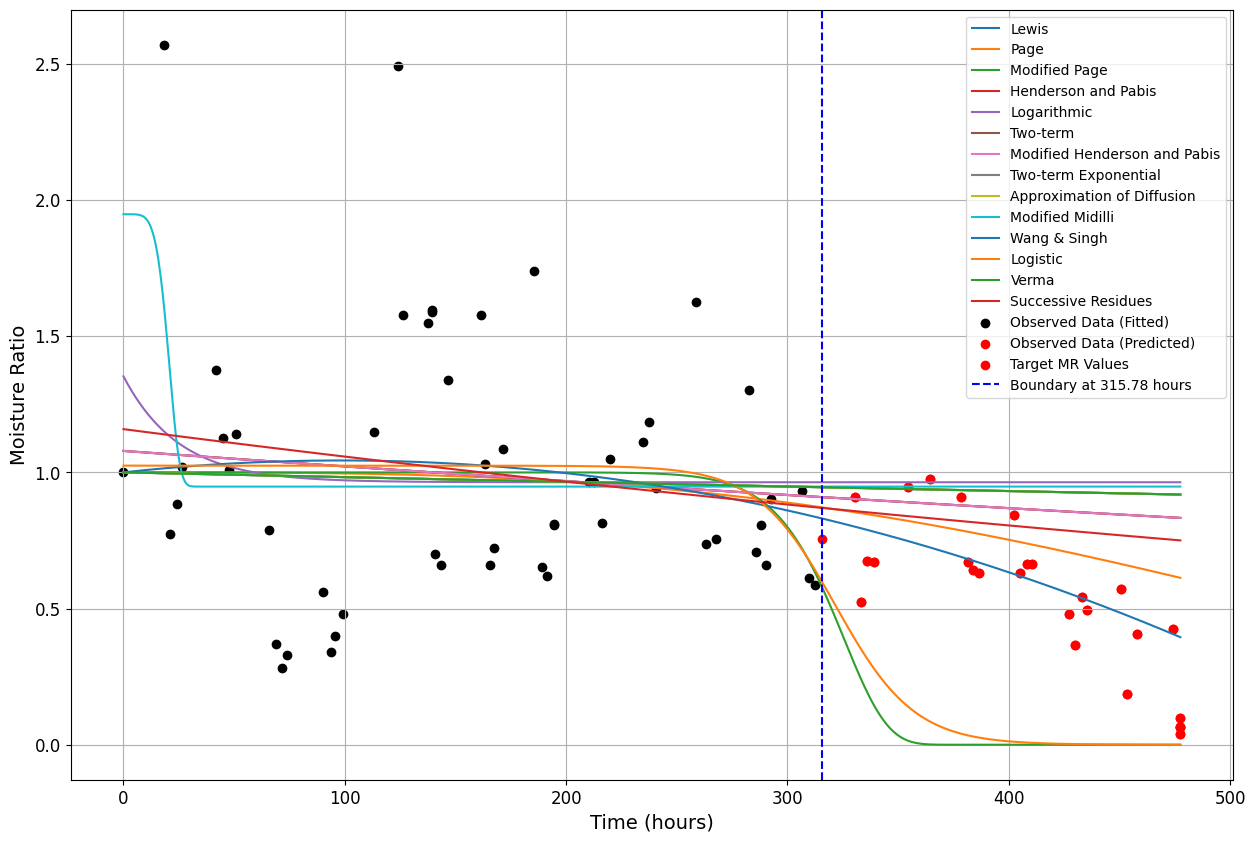

In [3]:
# Define the boundary time
boundary_time = 315.78  # Set the boundary time to 315.78

# Split the data into fitted and predicted parts based on the boundary time
split_index = np.where(time_hours <= boundary_time)[0][-1]  # Index where time_hours <= 315.78

fitted_M_t = M_t[:split_index + 1]  # Data up to boundary_time (inclusive)
fitted_time_hours = time_hours[:split_index + 1]  # Corresponding time values
fitted_MR_data = MR_data[:split_index + 1]  # Corresponding MR values
fitted_temperature_data = temperature_data[:split_index + 1]  # Corresponding temperature values

predicted_M_t = M_t[split_index + 1:]  # Data after boundary_time
predicted_time_hours = time_hours[split_index + 1:]  # Corresponding time values
predicted_MR_data = MR_data[split_index + 1:]  # Corresponding MR values
predicted_temperature_data = temperature_data[split_index + 1:]  # Corresponding temperature values

# Plotting
plt.figure(figsize=(15, 10))
for model_name, params in model_params.items():
    try:
        if model_name == "Successive Residues":
            # For Successive Residues, pass temperature data as an additional argument
            popt, _ = curve_fit(lambda t, a, b, c, d, e, f: params["func"](t, a, b, c, d, e, f, fitted_temperature_data), fitted_time_hours, fitted_MR_data, p0=params["p0"][:-1], bounds=(params["bounds"][0][:-1], params["bounds"][1][:-1]), maxfev=10000)
        else:
            # For other models, fit as usual
            popt, _ = curve_fit(params["func"], fitted_time_hours, fitted_MR_data, p0=params["p0"], bounds=params["bounds"], maxfev=10000)
        
        # Predict for the entire range (up to the last time point)
        all_hours = np.linspace(0, max(time_hours), 1000)
        if model_name == "Successive Residues":
            predicted = params["func"](all_hours, *popt, temperature_data.mean())  # Use mean temperature for prediction
        else:
            predicted = params["func"](all_hours, *popt)
        
        # Plot the fitted and predicted parts of the model with the same color and line style
        plt.plot(all_hours, predicted, label=f"{model_name}")
        
        # Calculate MSE and R² for the fitted part of the model
        if model_name == "Successive Residues":
            fitted_predicted_MR = params["func"](fitted_time_hours, *popt, fitted_temperature_data)
        else:
            fitted_predicted_MR = params["func"](fitted_time_hours, *popt)
        mse = mean_squared_error(fitted_MR_data, fitted_predicted_MR)
        r2 = r2_score(fitted_MR_data, fitted_predicted_MR)
        
        # Calculate initial MR (t = 0) and final MR (t = max(fitted_time_hours))
        if model_name == "Successive Residues":
            initial_MR = params["func"](0, *popt, temperature_data.mean())
            final_MR = params["func"](max(fitted_time_hours), *popt, temperature_data.mean())
        else:
            initial_MR = params["func"](0, *popt)
            final_MR = params["func"](max(fitted_time_hours), *popt)
        
        # Print the coefficients, MSE, R², initial MR, and final MR for each model
        print(f"{model_name} Coefficients: {popt}")
        print(f"{model_name} MSE: {mse:.4f}")
        print(f"{model_name} R²: {r2:.4f}")
        print(f"{model_name} Initial MR: {initial_MR:.4f}")
        print(f"{model_name} Final MR: {final_MR:.4f}")
        print("-" * 50)
    except Exception as e:
        print(f"Error fitting {model_name}: {e}")

# Plot observed data
plt.scatter(fitted_time_hours, fitted_MR_data, color='black', label='Observed Data (Fitted)')
plt.scatter(predicted_time_hours, predicted_MR_data, color='red', label='Observed Data (Predicted)')  # Predicted data in red

# Target moisture content values and their corresponding hours
target_M_t = np.array([30.1, 21.6, 24.9, 24.8, 30.9, 31.6, 30.1, 24.8, 24.2, 23.9, 28.6, 23.9, 24.7, 24.7, 20.6, 18.1, 22.0, 20.9, 22.6, 14.1, 19.0, 19.4, 11.4, 12.2, 11.4, 10.9])
target_hours = np.array([330.500323611111, 333.319621944445, 335.896067222222, 339.105314722222, 354.357276666667, 364.242760277778, 378.565711388889, 381.589519722222, 384.020726111111, 386.630160555556, 402.349725277778, 405.065786666667, 408.136698611111, 410.610462777778, 427.329307777778, 430.013140833333, 433.192776111111, 435.538455833333, 450.742431111111, 453.525330833333, 457.924441111111, 474.358910555556, 477.136768055556, 477.284656666667, 477.36063, 477.4769725])

# Calculate MR for the target moisture content values
target_MR = (target_M_t - M_e) / (M_0 - M_e)

# Plot the target MR values at their respective hours
plt.scatter(target_hours, target_MR, color='red', label='Target MR Values')

# Add a vertical line at the boundary time (315.78)
plt.axvline(x=boundary_time, color='blue', linestyle='--', label='Boundary at 315.78 hours')

plt.xlabel('Time (hours)', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Moisture Ratio', fontsize=14)  # Increase y-axis label font size
#plt.title('Model Fitting and Predictions')
plt.legend()
plt.grid()
# Set font sizes for axis labels, tick labels, and title

#plt.title('Model Fitting', fontsize=16)  # Increase title font size
plt.xticks(fontsize=12)  # Increase x-axis tick label font size
plt.yticks(fontsize=12)  # Increase y-axis tick label font size

# Save the graph as a PNG file
plt.savefig('model_fitting_and_predictions.png', dpi=300, bbox_inches='tight')

plt.show()